In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

Goal: find out which types of games are most likely rated favorably by users.
ex. early access, free-to-play, M-rated, T-rated, E-rated, genres, etc

What are some common things that users write about in their reviews?
ex. gameplay, story, sound, graphics, buisness strategy, etc

In [12]:
df_test = pd.read_csv("../Data/test_gr/test.csv")
df_train = pd.read_csv("../Data/train_gr/train.csv")
df_overview = pd.read_csv("../Data/train_gr/game_overview.csv")
df_train.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


In [13]:
df_train.describe()

,review_id,year,user_suggestion
count,17494.000000,17316.000000,17494.000000
mean,12423.216989,2016.388427,0.569795
std,7653.367660,1.390356,0.495119
min,1.000000,2011.000000,0.000000
25%,5769.250000,2015.000000,0.000000
50%,11756.500000,2017.000000,1.000000
75%,18926.750000,2018.000000,1.000000
max,25539.000000,2018.000000,1.000000


In [14]:
df_filtered = df_train[df_train["title"] == "Sakura Clicker"]
df_filtered.head()


,review_id,title,year,user_review,user_suggestion
362,363,Sakura Clicker,2015.0,First of all I must say the plot is amazing. I...,1
363,364,Sakura Clicker,2015.0,Sublimely Magnificent game which put your mind...,1
364,365,Sakura Clicker,2016.0,"It's free & 'amusing,' but it's arguably one o...",0
365,366,Sakura Clicker,2018.0,Sakura clicker is a game where you click on th...,1
366,367,Sakura Clicker,2016.0,I disappointed my family..my dad punched me al...,1


In [15]:
genre = []
#iterate through tags column and concat into a single dataframe
for i, row in df_overview["tags"].items():
    df = row.replace("[", "").replace("]", "").replace("'", "")
    df_overview["tags"][i] = df
    genre = genre + df.split(", ")
df_genre = pd.DataFrame(data=genre)
#df_overview["tags"].head()
df_genre.value_counts()

Free to Play             63
Multiplayer              61
Action                   54
Massively Multiplayer    48
Co-op                    42
                         ..
City Builder              1
Side Scroller             1
Cartoony                  1
Cartoon                   1
Real-Time                 1
Name: count, Length: 161, dtype: int64

TODO: combine df_train and genre so that title is matched with correct genre

In [16]:
d = df_train.groupby([df_train["title"]], as_index=False).agg({"user_suggestion": "mean"}).sort_values(by="user_suggestion", ascending=False)
#genre_df = df.groupby([df_train["title"], df_overview["tags"]]).agg({"user_suggestion": "mean"})
#genre_df.columns = ["user_suggestion_mean"]
#genre_df = genre_df.reset_index()
d

,title,user_suggestion
14,EverQuest II,0.971014
16,Fractured Space,0.958217
21,Path of Exile,0.906114
6,Creativerse,0.900407
22,PlanetSide 2,0.896186
34,Tactical Monsters Rumble Arena,0.894737
33,Spooky's Jump Scare Mansion,0.886740
27,Ring of Elysium,0.875895
4,Brawlhalla,0.865854
32,Shop Heroes,0.865385


In [17]:
match_df = d["title"].isin(df_overview["title"])
d["tags"] = np.nan
for i, row in d.iterrows():
    s = row["title"]
    tag = df_overview.loc[df_overview["title"] == s]
    d["tags"][i] = tag["tags"].item()
d



C:\Users\dylan\AppData\Local\Temp\ipykernel_15908\1064366843.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["tags"][i] = tag["tags"].item()
C:\Users\dylan\AppData\Local\Temp\ipykernel_15908\1064366843.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Free to Play, Massively Multiplayer, RPG, MMORPG, Fantasy, Crafting, Open World, Adventure, Exploration, Multiplayer, Action, Character Customization, Singleplayer, Classic, Sandbox, FPS' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  d["tags"][i] = tag["tags"].item()


,title,user_suggestion,tags
14,EverQuest II,0.971014,"Free to Play, Massively Multiplayer, RPG, MMOR..."
16,Fractured Space,0.958217,"Space, Multiplayer, Free to Play, PvP, MOBA, A..."
21,Path of Exile,0.906114,"Free to Play, Action RPG, Hack and Slash, RPG,..."
6,Creativerse,0.900407,"Free to Play, Survival, Open World, Multiplaye..."
22,PlanetSide 2,0.896186,"Free to Play, Massively Multiplayer, FPS, Shoo..."
34,Tactical Monsters Rumble Arena,0.894737,"Free to Play, Strategy, Multiplayer, Turn-Base..."
33,Spooky's Jump Scare Mansion,0.886740,"Horror, Free to Play, Cute, First-Person, Sing..."
27,Ring of Elysium,0.875895,"Early Access, Free to Play, Battle Royale, Sho..."
4,Brawlhalla,0.865854,"Free to Play, Multiplayer, Fighting, 2D, 2D Fi..."
32,Shop Heroes,0.865385,"Free to Play, Simulation, Casual, Strategy, RP..."


<Axes: xlabel='user_suggestion'>

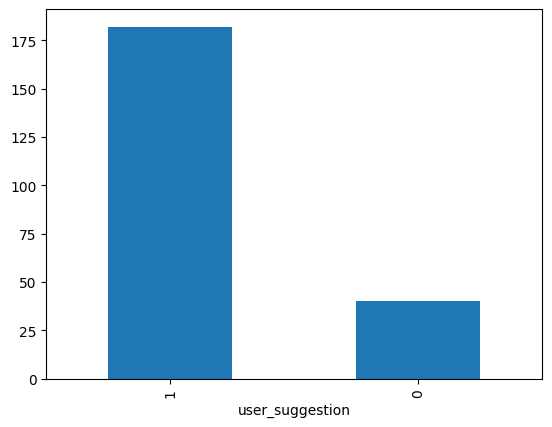

In [18]:
df_filtered["user_suggestion"].value_counts().plot(kind="bar")

<Axes: xlabel='title', ylabel='user_suggestion'>

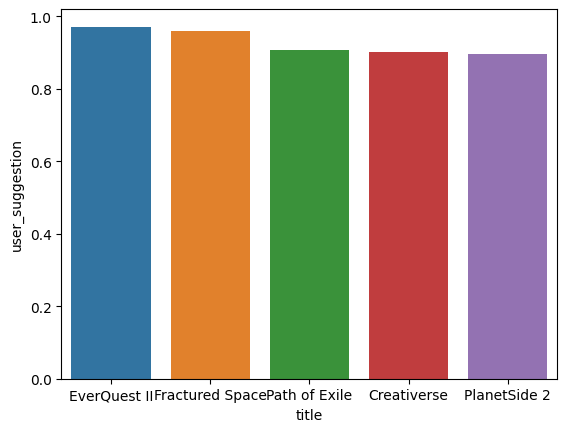

In [19]:
sns.barplot(data=d[:5], x="title", y="user_suggestion", hue="title")

TODO:
From here the data can be further broken down into the genres of each game plotted against the user suggestion.

In [20]:
sample_fps = d[d["tags"].str.contains("FPS", case=False)]
sample_co = d[d["tags"].str.contains("Co-op", case=False)]
sample_horror = d[d["tags"].str.contains("Horror", case=False)]

<Axes: xlabel='title', ylabel='user_suggestion'>

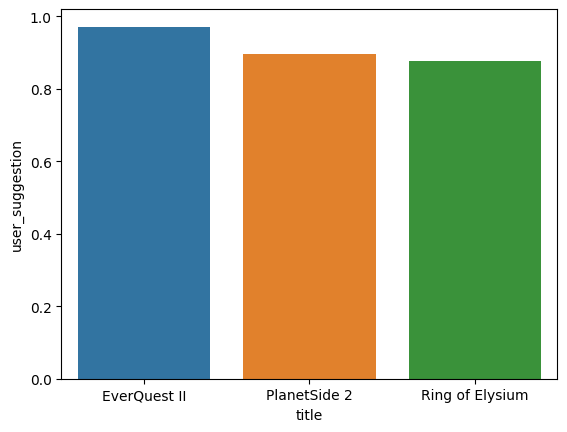

In [21]:
sns.barplot(data=sample_fps[:3], x="title", y="user_suggestion", hue="title")

In [22]:
example = pd.DataFrame({
    "title": ["spooky's jump scare mansion", "team fortress 2", "counter strike", "Cuisine Royale"],
    "tags": ["Horror", "FPS", "FPS", "Horror"],
    "user_suggestion_mean": [0.653378, 0.876493, 0.824256, 0.528754]
})

<Axes: xlabel='tags', ylabel='user_suggestion_mean'>

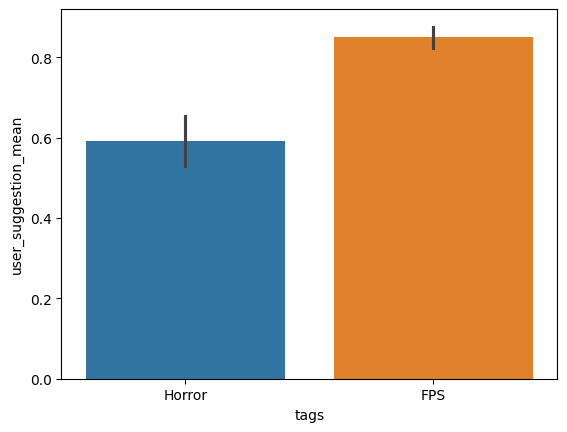

In [23]:
sns.barplot(data=example, x="tags", y="user_suggestion_mean", hue="tags")